In [2]:
import numpy as np
from IPython.display import display
import pandas as pd

In [ ]:
# Pandas Topics Covered

## 1. Basic DataFrame Operation
Reading CSV files with `pd.read_csv`
Basic DataFrame inspection with `info()` and `describe
Data type conversion with `pd.to_numeric`
String operations with `.str` methods
String cleaning with strip, replace, capitalize

## 2. GroupBy Operations
Basic groupby with `df.groupby`
Aggregation methods: `mean()`, `max()`, `min()`, `count()`
Multiple column groupby with `df.groupby(['col1','col2'])`
Advanced aggregation with `agg()` and multiplnctions
Handling multi-level indexes a groupby
Using `reset_index()` after groupby

## 3. Advanced GroupBy Techniques
Accessing specific groups witget_group()`
Using `nlargest` with groupby
Using `xs()` to slice cross-sections of hierarchical indexes
Filtering with conditions after groupby
Swapping level and sorting multi-level indexes with `swaplevel()` and `sort_index()`

## 4. DataFrame Joining and Merging
4.1. Using `pd.merge()` with different join types (innouter, left, right)
4.2. Using `suffixes` parameter to handlplicate column names
4.3. Merging on different column names withft_on` and `right_on`
4.4. Cross joins with `how='cross'`

## 5. Concat
Concatenating DataFrames with `pd.concat()` along different axes

## 6. Data Filling and Cleaning
forward fill with `ffill()`
backward fill with `bfil
Chaining fill methods

## 7. Data Analysis Functions
Using `value_counts()` for frequency analysis
Filtering  `between()` and boolean indexing
Creating  custom statistics DataFrames
Using agg() for multiple statistical operations

In [16]:
# Example DataFrame
data = {'A': [1, None, 3, None], 'B': [None, 2, None, 4]}
df = pd.DataFrame(data)

# Forward fill
df_ffill = df.ffill()

print(df)
print(df.ffill())

# Backwards fill
print(df.bfill())

print(df.bfill().ffill())

     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  NaN
3  NaN  4.0
     A    B
0  1.0  NaN
1  1.0  2.0
2  3.0  2.0
3  3.0  4.0
     A    B
0  1.0  2.0
1  3.0  2.0
2  3.0  4.0
3  NaN  4.0
     A    B
0  1.0  2.0
1  3.0  2.0
2  3.0  4.0
3  3.0  4.0


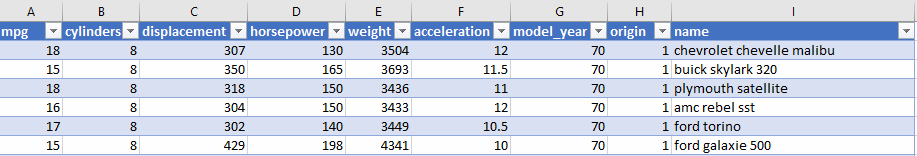

mpg (צריכת דלק במיילים לגלון)
cylinders (מספר צילינדרים)
displacement (נפח מנוע) 
horsepower (כוח סוס)
weight (משקל) pound
acceleration (תאוצה) 0-60 mph
model_year (שנת דגם)
origin (מקור) - USA EU JAPAN
name (שם)

In [10]:
df = pd.read_csv("mpg.csv")

#display(df)
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [45]:
df = pd.read_csv("mpg.csv")

df.groupby('model_year')['weight'].mean()  # Series
df.groupby('model_year')[['weight']].mean()  # DataFrame
df.groupby('model_year')[['weight']].max()  
df.groupby('model_year')[['weight']].min()  
df.groupby('model_year')['weight'].value_counts().sort_values()
display(df.groupby('model_year')['model_year'].value_counts())
display(df.groupby('model_year').size())  # how many in each group
display(df['model_year'].unique())
display(df['model_year'].value_counts())

df.groupby('model_year')['cylinders'].value_counts()


model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: count, dtype: int64

model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
dtype: int64

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

model_year  cylinders
70          8            18
            4             7
            6             4
71          4            13
            6             8
            8             7
72          4            14
            8            13
            3             1
73          8            20
            4            11
            6             8
            3             1
74          4            15
            6             7
            8             5
75          4            12
            6            12
            8             6
76          4            15
            6            10
            8             9
77          4            14
            8             8
            6             5
            3             1
78          4            17
            6            12
            8             6
            5             1
79          4            12
            8            10
            6             6
            5             1
80          4            2

In [62]:
df = pd.read_csv("mpg.csv")

groups = df.groupby('model_year')[['weight', 'mpg']].mean().reset_index()
display(groups[groups['model_year'] < 80])

,model_year,weight,mpg
0,70,3372.793103,17.689655
1,71,2995.428571,21.250000
2,72,3237.714286,18.714286
3,73,3419.025000,17.100000
4,74,2877.925926,22.703704
5,75,3176.800000,20.266667
6,76,3078.735294,21.573529
7,77,2997.357143,23.375000
8,78,2861.805556,24.061111
9,79,3055.344828,25.093103


In [85]:
df = pd.read_csv("mpg.csv")

#### targil

# group by model_year and show max horsepower and avg acceleration
# find all rows which are between model year 75 - 80
# find all rows which max horsespower > 90 and avg acceleration < 15.8

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

groups_year = df.groupby('model_year').agg({
    'horsepower': 'max',
    'acceleration': 'mean'}).rename(columns={'horsepower': 'max-horsepower', 'acceleration': 'avg-acceleration'})  #.reset_index()

#display(groups_year[groups_year['model_year'].between(75, 80)])  # need to perform reset_index

display(groups_year.loc[75:80])  # keep the model_year as the index
# display(groups_year.iloc[0:5])  # keep the model_year as the index

display(groups_year[(groups_year['max-horsepower'] > 90) & (groups_year['avg-acceleration'] < 15)])


,max-horsepower,avg-acceleration
model_year,,
75,170.0,16.050000
76,180.0,15.941176
77,190.0,15.435714
78,165.0,15.805556
79,155.0,15.813793
80,132.0,16.934483


,max-horsepower,avg-acceleration
model_year,,
70,225.0,12.948276
73,230.0,14.312500


In [104]:
df = pd.read_csv("mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# operation on the entire group 
df.groupby('model_year').value_counts()
df.groupby('model_year').max()[['mpg']]

df.groupby('model_year')['horsepower'].nlargest(3)  # 70 [group-year]  8 [index=row-number]  225.0 [horsepower-value]

df.groupby('model_year').max().loc[74]

mpg                          32.0
cylinders                       8
displacement                350.0
horsepower                  150.0
weight                       4699
acceleration                 21.0
origin                          3
name            volkswagen dasher
Name: 74, dtype: object

In [117]:
df = pd.read_csv("mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.groupby(['model_year', 'cylinders']).max(numeric_only=True)  # only numeric columns
df.groupby(['model_year', 'cylinders']).mean(numeric_only=True)  # only numeric columns
df.groupby(['model_year', 'cylinders'])[['horsepower']].mean()

df.groupby(['model_year', 'cylinders'])[['model_year', 'cylinders']].value_counts().sort_values()
df.groupby(['model_year', 'cylinders'])[['model_year', 'cylinders']].value_counts()

df.groupby(['model_year', 'cylinders'])[['horsepower']].mean()

horsepower
model_year cylinders            
70         4           87.714286
           6           91.750000
           8          183.666667
71         4           77.583333
           6           98.875000
           8          166.857143
72         3           97.000000
           4           85.142857
           8          159.692308
73         3           90.000000
           4           82.909091
           6          102.125000
           8          170.000000
74         4           74.000000
           6          101.666667
           8          146.000000
75         4           84.916667
           6           96.750000
           8          142.000000
76         4           75.600000
           6           98.700000
           8          146.333333
77         3          110.000000
           4           78.785714
           6          102.000000
           8          152.375000
78         4           79.705882
           5          103.000000
           6          109.833333
           8          135.500000
79         4           75.750000
           5           77.000000
           6          105.000000
           8          131.900000
80         3          100.000000
           4           74.043478
           5           67.000000
           6          111.000000
81         4           72.950000
           6          100.714286
           8          105.000000
82         4           79.148148
           6          102.333333

In [146]:
df = pd.read_csv("mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.groupby(['model_year', 'cylinders']).mean(numeric_only=True)
df.groupby(['model_year', 'cylinders']).max().index[:4]  # index is tuple i.e. (70, 4)
df.groupby(['model_year', 'cylinders']).max().loc[(71, 4)]
df.groupby(['model_year', 'cylinders']).max().iloc[0]
df.groupby(['model_year', 'cylinders']).mean(numeric_only=True).reset_index()

# can fetch using 1st index, cannot using 2nd
df.groupby(['model_year', 'cylinders']).max().loc[70]
groupby_year = df.groupby(['model_year', 'cylinders']).max(numeric_only=True)
groupby_year

# XS
result = groupby_year.xs(level='cylinders', key=8)
result['cylinders'] = 8
result
# groupby_year.xs(level='cylinders', key=8).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_1904\538305298.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['cylinders'] = 8


,model_year,mpg,displacement,horsepower,weight,acceleration,origin
0,70,18.0,455.0,225.0,4732,18.5,1
1,71,14.0,400.0,180.0,5140,13.5,1
2,72,17.0,429.0,208.0,4633,16.0,1
3,73,16.0,455.0,230.0,4997,14.5,1
4,74,16.0,350.0,150.0,4699,16.0,1
5,75,20.0,400.0,170.0,4668,14.5,1
6,76,17.5,351.0,180.0,4380,15.0,1
7,77,17.5,400.0,190.0,4335,19.0,1
8,78,20.2,318.0,145.0,4080,15.5,1
9,79,23.9,360.0,155.0,4360,22.2,1


In [157]:
df = pd.read_csv("mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# XS
result = df.groupby(['model_year', 'cylinders']).max().xs(level='cylinders', key=8)

df[df['cylinders'] == 8].groupby(['model_year', 'cylinders']).max()
df[df['cylinders'].isin([6, 8])].groupby(['model_year', 'cylinders']).max()
df[~df['cylinders'].isin([8])].groupby(['model_year', 'cylinders']).max()
df[~df['model_year'].isin([72])].groupby(['model_year', 'cylinders']).max()

# groupby_year.xs(level='cylinders', key=8).reset_index()

mpg  displacement  horsepower  weight  acceleration  \
model_year cylinders                                                         
70         4          27.0         121.0       113.0    2672          20.5   
           6          22.0         200.0        97.0    2833          16.0   
           8          18.0         455.0       225.0    4732          18.5   
71         4          35.0         140.0        95.0    2408          20.5   
           6          19.0         258.0       110.0    3439          15.5   
           8          14.0         400.0       180.0    5140          13.5   
73         3          18.0          70.0        90.0    2124          13.5   
           4          29.0         140.0       112.0    2868          21.0   
           6          23.0         250.0       122.0    3278          18.0   
           8          16.0         455.0       230.0    4997          14.5   
74         4          32.0         140.0        97.0    2542          21.0   
           6          21.0         258.0       110.0    3781          18.0   
           8          16.0         350.0       150.0    4699          16.0   
75         4          33.0         140.0       115.0    2957          18.5   
           6          21.0         258.0       110.0    3907          21.0   
           8          20.0         400.0       170.0    4668          14.5   
76         4          33.0         140.0       102.0    3270          22.2   
           6          24.0         258.0       120.0    3820          21.0   
           8          17.5         351.0       180.0    4380          15.0   
77         3          21.5          80.0       110.0    2720          13.5   
           4          36.0         151.0       110.0    2755          18.6   
           6          22.0         250.0       110.0    3630          19.0   
           8          17.5         400.0       190.0    4335          19.0   
78         4          43.1         156.0       115.0    2855          21.5   
           5          20.3         131.0       103.0    2830          15.9   
           6          20.8         258.0       165.0    3620          19.2   
           8          20.2         318.0       145.0    4080          15.5   
79         4          37.3         151.0        90.0    3190          24.8   
           5          25.4         183.0        77.0    3530          20.1   
           6          28.8         232.0       115.0    3360          18.2   
           8          23.9         360.0       155.0    4360          22.2   
80         3          23.7          70.0       100.0    2420          12.5   
           4          46.6         156.0       105.0    3250          23.7   
           5          36.4         121.0        67.0    2950          19.9   
           6          32.7         225.0       132.0    3381          18.7   
81         4          39.1         156.0       100.0    3230          20.7   
           6          30.7         231.0       120.0    3465          19.6   
           8          26.6         350.0       105.0    3725          19.0   
82         4          44.0         156.0        96.0    3035          24.6   
           6          38.0         262.0       112.0    3015          17.0   

                      origin                               name  
model_year cylinders                                             
70         4               3       volkswagen 1131 deluxe sedan  
           6               1                    plymouth duster  
           8               1                   pontiac catalina  
71         4               3               volkswagen model 111  
           6               1                   pontiac firebird  
           8               1                pontiac safari (sw)  
73         3               3                          maxda rx3  
           4               3                        volvo 144ea  
           6               3                     toyota mark ii  
           8        

In [169]:
df = pd.read_csv("mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.groupby(['cylinders', 'model_year']).max()  # ideal-original

df.groupby(['model_year', 'cylinders']).max().swaplevel()  # not nice groups

df.groupby(['model_year', 'cylinders']).max().swaplevel().sort_index(level=['cylinders', 'model_year'])  # like original

df.groupby(['model_year', 'cylinders']).max().swaplevel().sort_index(level=['cylinders', 'model_year'], ascending=[True, False]).loc[[4, 6]]  


mpg  displacement  horsepower  weight  acceleration  \
cylinders model_year                                                         
4         82          44.0         156.0        96.0    3035          24.6   
          81          39.1         156.0       100.0    3230          20.7   
          80          46.6         156.0       105.0    3250          23.7   
          79          37.3         151.0        90.0    3190          24.8   
          78          43.1         156.0       115.0    2855          21.5   
          77          36.0         151.0       110.0    2755          18.6   
          76          33.0         140.0       102.0    3270          22.2   
          75          33.0         140.0       115.0    2957          18.5   
          74          32.0         140.0        97.0    2542          21.0   
          73          29.0         140.0       112.0    2868          21.0   
          72          28.0         140.0       112.0    2979          23.5   
          71          35.0         140.0        95.0    2408          20.5   
          70          27.0         121.0       113.0    2672          20.5   
6         82          38.0         262.0       112.0    3015          17.0   
          81          30.7         231.0       120.0    3465          19.6   
          80          32.7         225.0       132.0    3381          18.7   
          79          28.8         232.0       115.0    3360          18.2   
          78          20.8         258.0       165.0    3620          19.2   
          77          22.0         250.0       110.0    3630          19.0   
          76          24.0         258.0       120.0    3820          21.0   
          75          21.0         258.0       110.0    3907          21.0   
          74          21.0         258.0       110.0    3781          18.0   
          73          23.0         250.0       122.0    3278          18.0   
          71          19.0         258.0       110.0    3439          15.5   
          70          22.0         200.0        97.0    2833          16.0   

                      origin                               name  
cylinders model_year                                             
4         82               3                          vw pickup  
          81               3                   volkswagen jetta  
          80               3               vw rabbit c (diesel)  
          79               3                   vw rabbit custom  
          78               3                volkswagen scirocco  
          77               3           volkswagen rabbit custom  
          76               3                          vw rabbit  
          75               3                        volvo 244dl  
          74               3                  volkswagen dasher  
          73               3                        volvo 144ea  
          72               3                    volvo 145e (sw)  
          71               3               volkswagen model 111  
          70               3       volkswagen 1131 deluxe sedan  
6         82               1  oldsmobile cutlass ciera (diesel)  
          81               3                       volvo diesel  
          80               3                        dodge aspen  
          79               1                  pontiac lemans v6  
          78               2                        volvo 264gl  
          77               3             plymouth volare custom  
          76               3                     toyota mark ii  
          75               1            plymouth valiant custom  
          74               1         plymouth satellite sebring  
          73               3                     toyota mark ii  
          71               1                   pontiac firebird  
          70               1                    plymouth duster

In [214]:
print('========== read mpg miles per gallon data on cars =======================')
df = pd.read_csv(r"mpg.csv")

## manual -- long way
mpg_mean = df['mpg'].mean()
weight_mean = df['weight'].mean()
mpg_max = df['mpg'].max()
weight_std = df['weight'].std()

print('mpg_mean', mpg_mean)
print('weight_mean', weight_mean)
print('mpg_max', mpg_max)
print('weight_std', weight_std)

columns = ['stats', 'mpg', 'weight']
data = [
    ['max', mpg_max, None],
    ['mean', mpg_mean, weight_mean],
    ['std', None, weight_std]
]

stats_df = pd.DataFrame(data=data, columns=columns)
display(stats_df)

## auto -- short way
display(df.agg({'mpg': ['max', 'mean', 'min', 'std'], 'weight': ['std', 'mean', 'min', 'max']}).T)

df.groupby(['cylinders', 'model_year']).agg({'weight': ['max', 'min'], 'mpg': 'mean', 'horsepower': ['min', 'count']})


========== read mpg miles per gallon data on cars =======================
mpg_mean 23.514572864321607
weight_mean 2970.424623115578
mpg_max 46.6
weight_std 846.8417741973271


,stats,mpg,weight
0,max,46.600000,NaN
1,mean,23.514573,2970.424623
2,std,NaN,846.841774


,max,mean,min,std
mpg,46.6,23.514573,9.0,7.815984
weight,5140.0,2970.424623,1613.0,846.841774


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,Ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,Vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,Dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,Ford ranger


In [182]:
######### concat by rows

df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
}, index=[0, 1, 2, 3])

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']
}, index=[4, 5, 6, 7])

# display(df1)
# display(df2)

display(pd.concat([df1, df2], axis=0))  
# display(pd.concat([df1, df2], axis=1))  # index should be the same

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [186]:
######### concat by columns

df3 = pd.DataFrame({
   'A': ['A0', 'A1', 'A2', 'A3'],
   'B': ['B0', 'B1', 'B2', 'B3']},
   index=[0, 1, 2, 3])

df4 = pd.DataFrame({
   'C': ['C0', 'C1', 'C2', 'C3'],
   'D': ['D0', 'D1', 'D2', 'D3']},
   index=[0, 1, 2, 3])

pd.concat([df3, df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [201]:
######################## merge
# inner, outer, left, right

login = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U3', 'U4'],
    'login_time': ['2022-01-01 12:30', '2022-01-02 10:30', '2022-01-05 09:30', '2022-01-10 08:00']
})

register = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U4', 'U5'],
    'registration_time': ['2021-12-20', '2021-12-28', '2022-01-01', '2022-01-08'],
    'name': ['Joe', 'Mike', 'Sue', 'Anna']
})

display('login', login)
display('register', register)

#print('========================= inner join')
pd.merge(login, register, on='user_id', how='inner',suffixes=('_login', '_register') )

# print('========================= left join')
pd.merge(login, register, on='user_id', how='left')

#print('========================= right join')
pd.merge(login, register, on='user_id', how='right')

#print('========================= outer join')
pd.merge(login, register, on='user_id', how='outer')



'login'

,user_id,login_time
0,U1,2022-01-01 12:30
1,U2,2022-01-02 10:30
2,U3,2022-01-05 09:30
3,U4,2022-01-10 08:00


'register'

,user_id,registration_time,name
0,U1,2021-12-20,Joe
1,U2,2021-12-28,Mike
2,U4,2022-01-01,Sue
3,U5,2022-01-08,Anna


,user_id,login_time,registration_time,name
0,U1,2022-01-01 12:30,2021-12-20,Joe
1,U2,2022-01-02 10:30,2021-12-28,Mike
2,U3,2022-01-05 09:30,NaN,NaN
3,U4,2022-01-10 08:00,2022-01-01,Sue
4,U5,NaN,2022-01-08,Anna


In [202]:
login = pd.DataFrame({
    
    'login_time': ['2024-11-01 10:00', '2024-11-01 11:00']
})

register = pd.DataFrame({

    'registration_date': ['2024-10-01', '2024-10-02']
})

display('corss-join login', login)
display('corss-join register', register)
print('========================= cross')
pd.merge(login, register, how='cross')

'corss-join login'

,login_time
0,2024-11-01 10:00
1,2024-11-01 11:00


'corss-join register'

,registration_date
0,2024-10-01
1,2024-10-02


========================= cross


,login_time,registration_date
0,2024-11-01 10:00,2024-10-01
1,2024-11-01 10:00,2024-10-02
2,2024-11-01 11:00,2024-10-01
3,2024-11-01 11:00,2024-10-02


In [205]:
shape1 = pd.DataFrame({
    
    'shape1': ['O', 'I', 'P']
})

shape2 = pd.DataFrame({
    
    'shape2': ['O', 'I', 'P']
})

shape3 = pd.DataFrame({
    
    'shape3': ['O', 'I', 'P']
})

print('========================= cross')
result = pd.merge(shape1, shape2, how='cross')
pd.merge(result, shape3, how='cross')

========================= cross


,shape1,shape2,shape3
0,O,O,O
1,O,O,I
2,O,O,P
3,O,I,O
4,O,I,I
5,O,I,P
6,O,P,O
7,O,P,I
8,O,P,P
9,I,O,O


In [210]:
import pandas as pd

# First DataFrame
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'score': [85, 90, 95]
})

# Second DataFrame with different key name: _id
df2 = pd.DataFrame({
    '_id': [2, 3, 4],
    'name': ['Bobby', 'Charles', 'Diana'],
    'score': [88, 93, 80]
})

display(df1)
display(df2)

# Merge using different column names
merged = pd.merge(df1, df2, left_on='id', right_on='_id', suffixes=('_left', '_right'))

merged


,id,name,score
0,1,Alice,85
1,2,Bob,90
2,3,Charlie,95


,_id,name,score
0,2,Bobby,88
1,3,Charles,93
2,4,Diana,80


,id,name_left,score_left,_id,name_right,score_right
0,2,Bob,90,2,Bobby,88
1,3,Charlie,95,3,Charles,93


In [215]:
my_array = ['ben ', ' hello', ' chair']
my_data = pd.Series(my_array)
data_after_change = my_data.str.replace(' ', '').str.strip().str.capitalize()  # BEST

display(data_after_change)

def clean(string):
  string = string.replace(' ', '').strip().capitalize()
  return string

display(data_after_change.apply(clean))
display(my_data.apply(lambda string: string.replace(' ', '').strip().capitalize()))

df = pd.read_csv(r"mpg.csv")
df['name'] = df['name'].str.capitalize()
df

0      Ben
1    Hello
2    Chair
dtype: object

0      Ben
1    Hello
2    Chair
dtype: object

0      Ben
1    Hello
2    Chair
dtype: object

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,Ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,Vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,Dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,Ford ranger
